<a href="https://colab.research.google.com/github/AilingLiu/Inferential_Statistics/blob/master/Experiment_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#To Start

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats.distributions import norm
from scipy.stats import shapiro
from scipy import stats

# Tests for normality

After plotting the data distribution using tools such as `sns.displot` and `qqplot`, we can conduct one of the below tests for normaltiy check whether it's significant.

$H_0$: Data is drawn from a Normal Distribution

- Shapiro-Wilk (good for smaller datasets) `scipy.stats.shapiro`
- D'Agostino K (uses kurtosis and skewness)
- Anderson-Darling (returns list of values)



In [3]:
penguins = sns.load_dataset('penguins')

In [4]:
penguins=penguins.dropna()
penguins.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

from statsmodels.graphics.gofplots import qqplotfrom scipy.stats.distributions import normqqplot(salaries['salary'],        line='s',        dist=norm)plt.show()

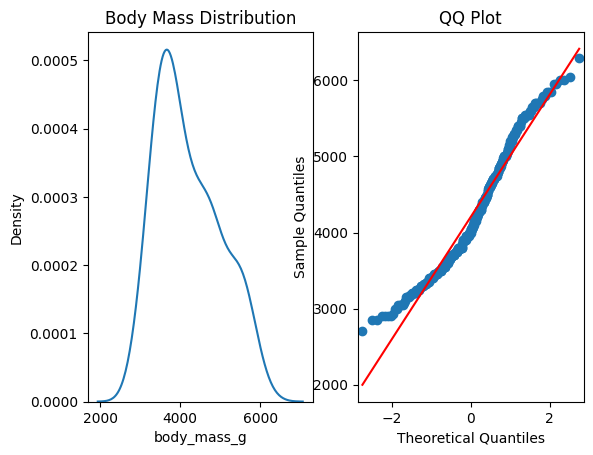

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.kdeplot(penguins, x='body_mass_g', ax=ax1)
ax1.set_title('Body Mass Distribution')

qqplot(penguins['body_mass_g'], line='s', dist=norm, ax=ax2)
ax2.set_title('QQ Plot')
plt.show()

The distribution has a normal bell shape on the left, but when compared with the normal distribution, we can see that the end part tapers off. Let's start the p value test of normality.

## The Shapiro-Wilk Test

In [11]:
stats, p=shapiro(penguins['body_mass_g'])
print(f'Stats:{stats}')
print(f'P value: {p}')

Stats:0.9580123688127105
P value: 3.567711408268874e-08


Based on the P value being so small, we can confidently reject the Null Hypothesis and conclude the Penguin body mass is not normally distributed.

## An Anderson-Darling test

In [6]:
from scipy.stats import anderson

result = anderson(x=penguins['body_mass_g'], dist='norm')
print(round(result.statistic, 4))
print(result.significance_level)
print(result.critical_values)

4.6146
[15.  10.   5.   2.5  1. ]
[0.569 0.648 0.778 0.907 1.079]


Since the calculated statistic value is greater than any of the critical values from the list of significance level, we fail to reject null hypothesis, hence the distribution of penguin body mass is likely not normal.

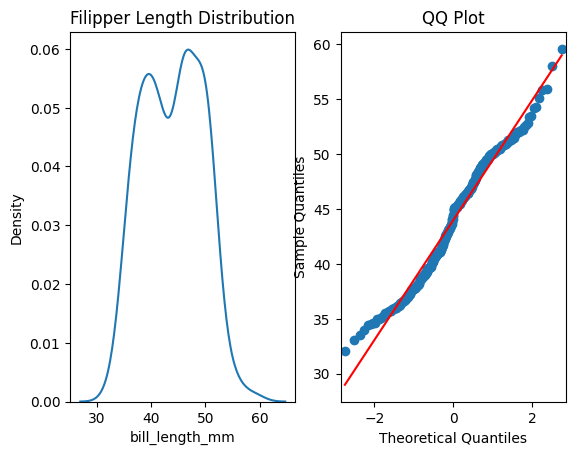

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.kdeplot(penguins, x='bill_length_mm', ax=ax1)
ax1.set_title('Filipper Length Distribution')

qqplot(penguins['bill_length_mm'], line='s', dist=norm, ax=ax2)
ax2.set_title('QQ Plot')
plt.show()

Another example of test of normality: iris petal length

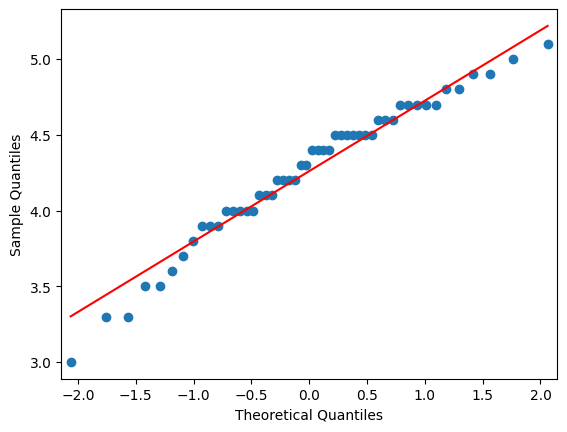

In [23]:
iris=sns.load_dataset('iris')

versicolor_length = iris.query('species=="versicolor"')['petal_length']
qqplot(versicolor_length, line='s', dist=norm);

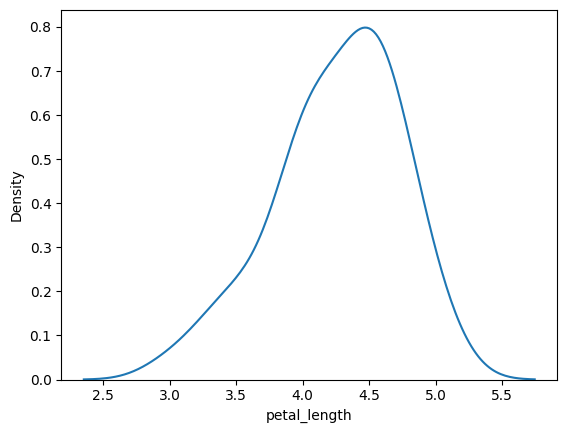

In [28]:
sns.kdeplot(versicolor_length);

In [27]:
shapiro(versicolor_length)

ShapiroResult(statistic=np.float64(0.96600440254332), pvalue=np.float64(0.15847783815657573))

The p-value here is greater than significance level (.05), hence fail to reject H Null. The distribution is likely normal.

In [1]:
from statsmodels.stats.proportion import proportions_ztest

z, pval=proportions_ztest(count=[60,63],nobs=[100, 150])
print(pval)

0.005288657396873256


In [2]:
from statsmodels.stats.proportion import proportion_confint

low, up = proportion_confint(count=[60,63],nobs=[100, 150], alpha=0.05)
low,up

(array([0.50398177, 0.34101564]), array([0.69601823, 0.49898436]))

# Calculate Power, Effect Size, and Sample Size for experiment

**Effect Size for mean**

cohens'D: $\frac{(\mu_b - \mu_a)}{SD_{pooled}}$

where $SD_{pooled}=\sqrt{\frac{var_A + var_B}{2}}$


**Effect Size for proportions**

cohens'H: $2arcsin\sqrt{p_1}-2arcsin\sqrt{p_2}$

* we can use `statsmodels.stats.porportion.porportion_effectsize(p_b, p_a)` to get the effect size of proportions.

Sample size estimation for means example

In [11]:
data=sns.load_dataset('exercise')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [18]:
data.groupby('diet').agg({'id':'count', 'pulse':'mean'})

<ipython-input-18-a91e36c34f81>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('diet').agg({'id':'count', 'pulse':'mean'})


id       pulse
diet                   
no fat   45  103.444444
low fat  45   95.955556

In [25]:
lowfat = data[data['diet']=='low fat']['pulse']
nofat = data[data['diet']=='no fat']['pulse']
std_effect_size=(nofat.mean()-lowfat.mean())/np.sqrt((lowfat.var()+nofat.var())/2)
print(f'standardized effect size: {std_effect_size:.2f}')


standardized effect size: 0.52


In [26]:
from statsmodels.stats.power import TTestIndPower

nobs=TTestIndPower().solve_power(effect_size=std_effect_size, nobs1=None, alpha=0.05, power=0.8, ratio=1)
print(f'sample size needed per group: {nobs:.0f}')

sample size needed per group: 59


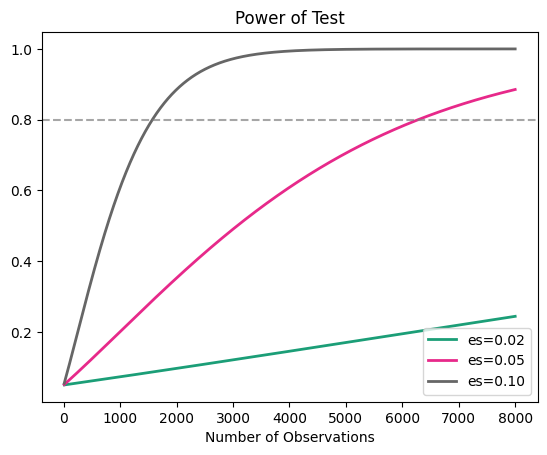

In [35]:
samplesize = np.array(range(10, 8000))
effectsize = np.array([0.02, 0.05, 0.1])

TTestIndPower().plot_power(nobs=samplesize, effect_size=effectsize)
plt.axhline(y=0.8, c='gray', alpha=0.7,linestyle='--')
plt.show()

# Multiple Comparisions tests

Multiple comparisions:
- multiple variants (A/B/n tests)
- multiple metrics
- granular categories


**Family-wise error rate**

* P(making Type I error) = a = 0.05
* P(not making Type I error) = 1 - $\alpha$
* P(not making Type I error in m tests) = $(1 - \alpha)^m$
* P(making at least one Type I error in m tests) = $1 - (1 - \alpha)^{m}$ = FWER

Family-wise Error Rate (FWER): the probability of making one or more type I errors when

performing multiple hypothesis tests.
* For a single test, FWER = 1 - (1 - $\alpha) *1 = \alpha$ = 0.05
* But what if we perform more than one test?

**Correction Methods**

Simple and more stringent method: **Bonferroni Correction**: $\alpha^*=\frac{\alpha}{m}$

• Set the adjusted $\alpha^*$ to the individual test $\alpha$ divided by the number of tests m

Less stringent **Sidak correction**: $\alpha_s=1-(1-\alpha)^{1/m}$

Both methods can be achieved by `statsmodels.stats.multitest.multipletests(pvals, alpha, method='')`.

Example:

We have a control group(A) and 3 test groups (BCD). After conducting multiple t tests, we have below P values. We then correct the P values.

In [1]:
import statsmodels.stats.multitest as smt

pvals=[0.023, 0.0005, 0.00004]

corrected = smt.multipletests(pvals, alpha=0.05, method='bonferroni')

print(f'Conclusion of each compared group: {corrected[0]}')
print(f'Conrrected P values: {corrected[1]}')
print(f'Corrected Alpha: {corrected[2]}')

Conclusion of each compared group: [False  True  True]
Conrrected P values: [0.069   0.0015  0.00012]
Corrected Alpha: 0.016952427508441503


In [2]:
import statsmodels.stats.multitest as smt

pvals=[0.023, 0.0005, 0.00004]

corrected = smt.multipletests(pvals, alpha=0.05, method='sidak')

print(f'Conclusion of each compared group: {corrected[0]}')
print(f'Conrrected P values: {corrected[1]}')
print(f'Corrected Alpha: {corrected[2]}')

Conclusion of each compared group: [False  True  True]
Conrrected P values: [0.06742517 0.00149925 0.00012   ]
Corrected Alpha: 0.016952427508441503


# Evaluate Ratio metics using Delta method

**Ratio Metrics**:

These are metrics that are expressed as a ratio, such as conversion rates or click-through rates.


**Delta Method:**

The delta method is a statistical technique used to approximate the variance of a function of random variables when those random variables have known variances and covariances. In the context of z-tests for ratio metrics, it's used to estimate the variance of the difference between the means of the two groups.

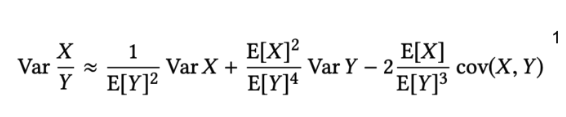

In [1]:
def var_delta(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    x_var = np.var(x,ddof=1)
    y_var = np.var(y,ddof=1)
    cov_xy = np.cov(x,y,ddof=1)[0][1]
    var_ratio = (x_var/y_bar**2 + y_var*(x_bar**2/y_bar**4) - 2*cov_xy*(x_bar/y_bar**3))/len(x)
    return var_ratio

In [2]:
def ztest_delta(x_control,y_control,x_treatment,y_treatment, alpha = 0.05):
    mean_control = x_control.sum()/y_control.sum()
    mean_treatment = x_treatment.sum()/y_treatment.sum()
    var_control = var_delta(x_control, y_control)
    var_treatment = var_delta(x_treatment, y_treatment)
    diff = mean_treatment - mean_control
    var = var_control + var_treatment
    # Calculate the two-tailed critical value
    cv = stats.norm.ppf(1-alpha/2)
    # Calculate the z_stat
    z_stat = diff/np.sqrt(var)
    # Calculate the p-value
    p_val = stats.norm.sf(abs(z_stat)) * 2.0
    # Calculate confidence intervals of the difference
    stde = cv*np.sqrt(var)
    lower = diff - stde
    upper = diff + stde
    result = {'mean_control':mean_control,
              'mean_treatment':mean_treatment,
              'difference':round(diff, 3),
              'diff_CI':"["+str(round(lower,3))+", "+str(round(upper,3))+"]",
              'p-value':p_val}
    return result

In [11]:
data=sns.load_dataset('tips')
data

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [14]:
female = data[data['sex']=='Female']
male = data[data['sex']=='Male']

ztest_delta(female['tip'], female['total_bill'], male['tip'], male['total_bill'])

{'mean_control': np.float64(0.15691778859925523),
 'mean_treatment': np.float64(0.14893976332741754),
 'difference': np.float64(-0.008),
 'diff_CI': '[-0.022, 0.006]',
 'p-value': np.float64(0.273760824152811)}

The P value suggests to fail to reject Null hypothesis, hence there's no sufficient evidence that male and female customers give different ratio of tips.